# Clustering

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Simple K-means clustering on the Iris dataset

In [23]:
df_iris = sns.load_dataset('iris')
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [24]:
array_iris = df_iris.iloc[:,[0,1,2,3]].values
array_iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#### Elbow method
It allows to pick the optimal number of clusters for clustering. 
Although we already know the answer is 3 it is still interesting to run.

Text(0, 0.5, 'WCSS')

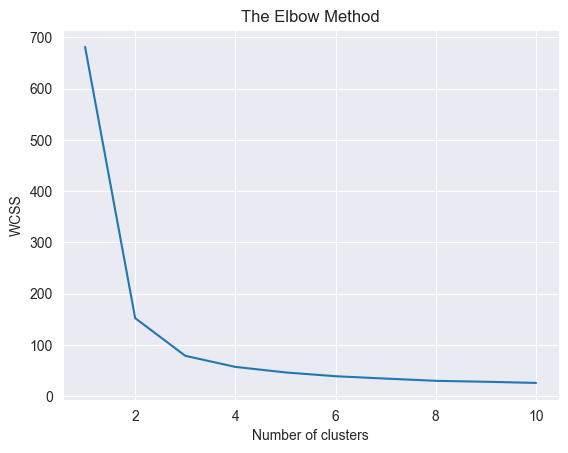

In [25]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(array_iris)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. Now that we have the optimum amount of clusters, we can move on to applying K-means clustering to the Iris dataset.

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(array_iris)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

#### Plot the clustering results using Matplotlib

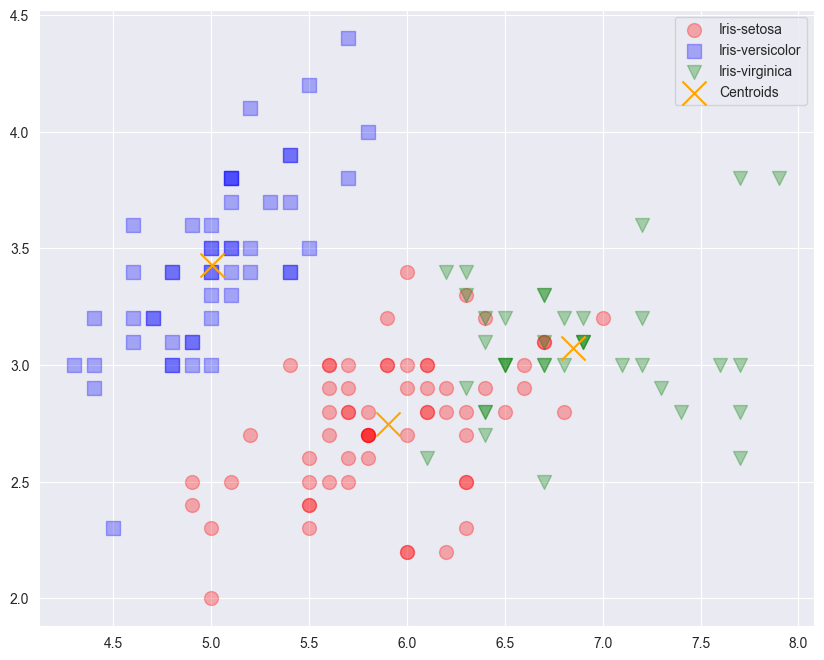

In [27]:
colors = ['red', 'blue', 'green']
markers = ['o','s', 'v']
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(10,8))

for i in range(len(labels)):
    plt.scatter(array_iris[y_kmeans == i, 0], array_iris[y_kmeans == i, 1], s=100, c=colors[i], marker=markers[i], label=labels[i], alpha=0.3)

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s = 300, c = 'orange', marker = 'x', label = 'Centroids')

plt.legend()

#### Plot the clustering results using Seaborn

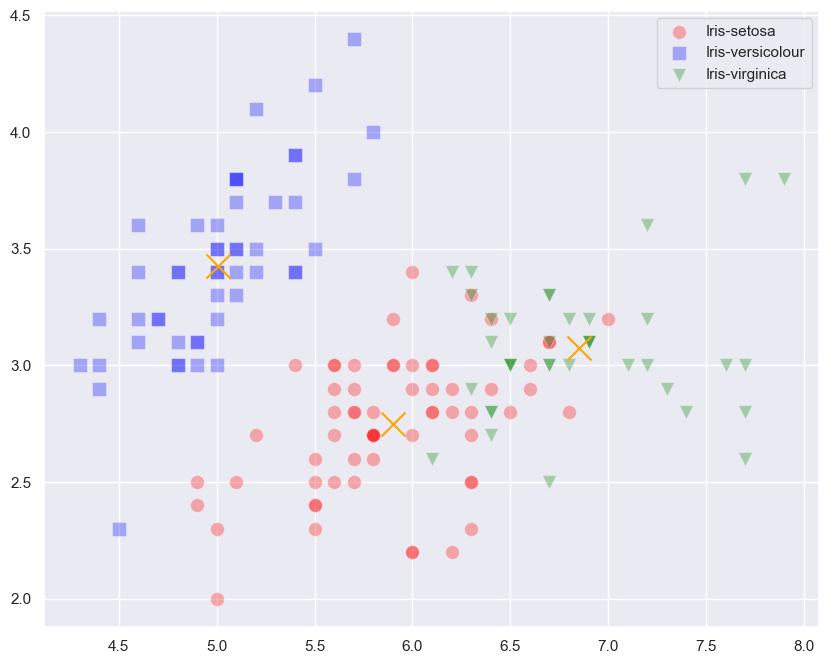

In [29]:
colors = ['red', 'blue', 'green']
markers = ['o','s', 'v']
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']

sns.set()

plt.figure(figsize=(10,8))

for i in range(len(labels)):
    sns.scatterplot(x=array_iris[y_kmeans == i, 0], y=array_iris[y_kmeans == i, 1], s=100, color=colors[i], marker=markers[i], label=labels[i], alpha=0.3)
    
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c = 'orange', marker='x', label = 'Centroids')

## Hierarchical clustering

In [30]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [30.0, 30.0, 71.25, 71.25],
  [5.0, 5.0, 50.625, 50.625],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [110.0, 110.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [170.0, 170.0, 192.5, 192.5],
  [125.0, 125.0, 181.25, 181.25],
  [27.8125, 27.8125, 153.125, 153.125]],
 'dcoord': [[0.0, 0.24494897427831785, 0.24494897427831785, 0.0],
  [0.0, 0.47958315233127163, 0.47958315233127163, 0.0],
  [0.24494897427831785,
   0.5477225575051661,
   0.5477225575051661,
   0.47958315233127163],
  [0.0, 0.24494897427831788, 0.24494897427831788, 0.0],
  [0.0, 0.22360679774997827, 0.22360679774997827, 0.0],
  [0.0, 0.4690415759823426, 0.469041575982

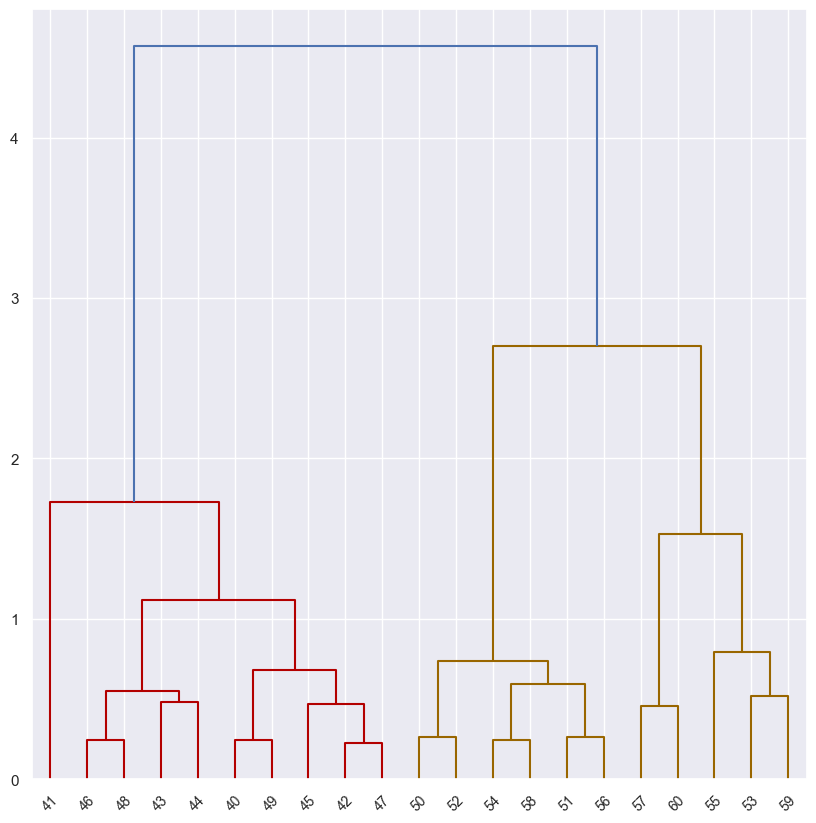

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy

plt.rcParams['figure.figsize'] = (10,10)
sub_df_iris = df_iris.drop('species', axis=1)

sub_df_40_60 = sub_df_iris.iloc[40:61,:]
Z = linkage(sub_df_40_60, method='complete')

hierarchy.set_link_color_palette(['#b30000','#996600'])

hierarchy.dendrogram(Z, labels=sub_df_40_60.index,leaf_rotation = 45, leaf_font_size = 10)

#### Plot the Heatmap

Text(92.25, 0.5, 'Samples')

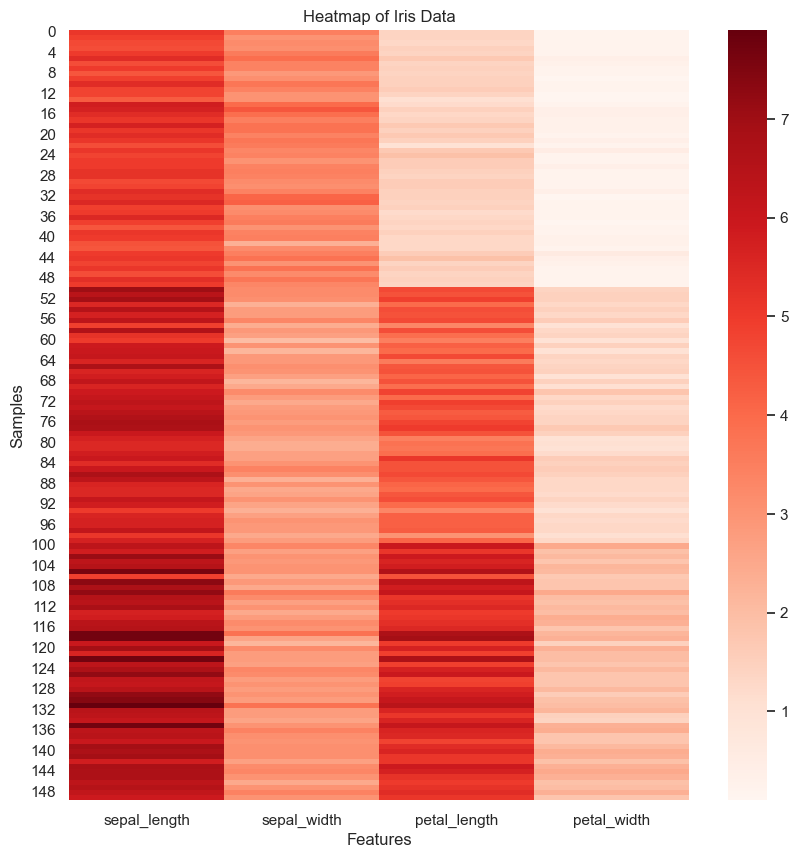

In [38]:
plt.rcParams["figure.figsize"] = (10,10)

sub_df_iris = df_iris.drop('species', axis=1)

sns.heatmap(sub_df_iris, cmap="Reds")

plt.title("Heatmap of Iris Data")
plt.xlabel("Features")
plt.ylabel("Samples")

#### Plot a Dendrogram with heatmap

#### Use different Distance Method

#### Use different clustering methods

## HDBSCAN

#### Plot the scatter for the first two features Sepal length and Sepal width

#### Run HDBScan

#### Plot the scatter plot for the first two features based on the clustering results

#### Plot the scatter for the first two features Petal length and Petal width